In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

# Loading Diabetes dataset

In [7]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [8]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes_dataset.shape

(768, 9)

In [14]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zero:
    diabetes_dataset[col] = diabetes_dataset[col].replace(0, np.nan)
    diabetes_dataset[col].fillna(diabetes_dataset[col].median(), inplace=True)

C:\Users\ronit\AppData\Local\Temp\ipykernel_13980\825230256.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_dataset[col].fillna(diabetes_dataset[col].median(), inplace=True)


# Feature Engineering


In [18]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

diabetes_dataset['BMI_Category'] = diabetes_dataset['BMI'].apply(bmi_category)


In [92]:
# Age Group
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle_Aged'
    else:
        return 'Senior'

diabetes_dataset['Age_Group'] = diabetes_dataset['Age'].apply(age_group)


In [39]:
diabetes_dataset['Glucose_Insulin'] = diabetes_dataset['Glucose'] * diabetes_dataset['Insulin']


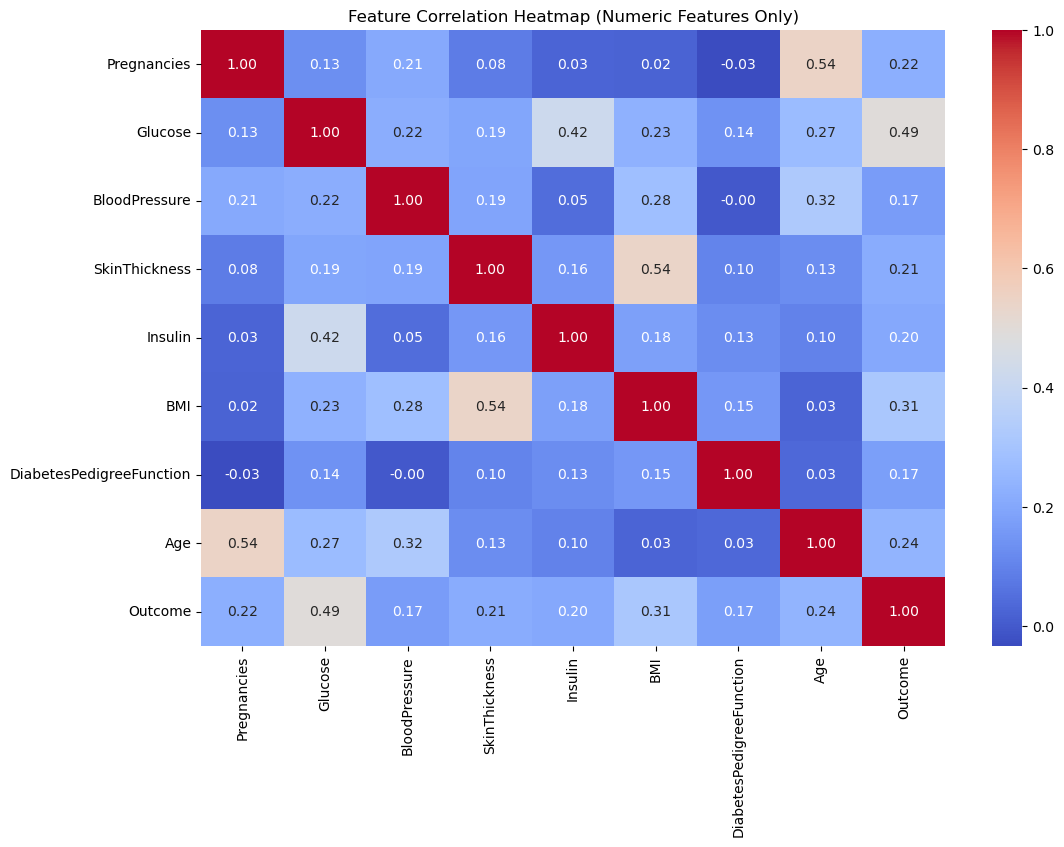

In [51]:
import seaborn as sns


numeric_data = diabetes_dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Numeric Features Only)')
plt.show()

In [53]:
# Separating dependent and independent variables
X= diabetes_dataset.iloc[:, :-1]
Y = diabetes_dataset['Outcome']

## Data Standardization

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


# training the model

In [61]:

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [63]:
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

In [65]:
print("✅ Training Accuracy:", accuracy_score(Y_train, train_predictions))
print("✅ Testing Accuracy :", accuracy_score(Y_test, test_predictions))
print("\n📊 Classification Report:\n", classification_report(Y_test, test_predictions))

✅ Training Accuracy: 1.0
✅ Testing Accuracy : 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        54

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



# Input Data

In [100]:
input_data = (1,85.0,66.0,29.0,125.0,26.0,0.587,20)

In [102]:
input_df = pd.DataFrame([input_data], columns=[
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [104]:
if 'Outcome' in input_df.columns:
    input_df = input_df.drop(columns='Outcome')

In [106]:
input_df['BMI_Category'] = bmi_category(input_df['BMI'][0])
input_df['Age_Group'] = age_group(input_df['Age'][0])
input_df['Glucose_Insulin'] = input_df['Glucose'][0] * input_df['Insulin'][0]

In [112]:
preprocessor = StandardScaler()
preprocessor.fit(X_train)

StandardScaler()

In [116]:
input_df = input_df.drop(['BMI_Category', 'Age_Group'], axis=1)

In [135]:
 
input_processed = preprocessor.transform(input_df)

prediction = classifier.predict(input_processed)
print("\n🔍 Prediction:", prediction)

if prediction[0] == 0:
    print("✅ The person is **not diabetic**")
else:
    print("⚠️ The person is **diabetic**")


🔍 Prediction: [1]
⚠️ The person is **diabetic**


C:\Users\ronit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
